<a href="https://colab.research.google.com/github/KevinTheRainmaker/Model_Serving/blob/main/ONNX/E2E_TensorflowTTS_KSS_with_ONNX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorflowTTS real time E2E-TTS demonstration

This notebook provides a demonstration of the realtime E2E-TTS using TensorflowTTS for Korea (Using KSS dataset)

- Github: https://github.com/TensorSpeech/TensorflowTTS
- Colab for Eng: https://colab.research.google.com/drive/1akxtrLZHKuMiQup00tzO2olCaN-y3KiD?usp=sharing

## Install

In [ ]:
!pip install -q tensorflow==2.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.7/489.7 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 KB 39.9 MB/s eta 0:00:00


In [ ]:
import os
!git clone https://github.com/TensorSpeech/TensorFlowTTS.git
os.chdir("TensorFlowTTS")
!pip install -q .
os.chdir("..")
import sys
sys.path.append("TensorFlowTTS/")

Cloning into 'TensorFlowTTS'...
remote: Enumerating objects: 10679, done.
remote: Total 10679 (delta 0), reused 0 (delta 0), pack-reused 10679
Receiving objects: 100% (10679/10679), 133.52 MiB | 17.82 MiB/s, done.
Resolving deltas: 100% (5163/5163), done.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.7/489.7 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 KB 26.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 102.2 MB/s eta 0:00:00
     ━━━

In [ ]:
# !pip install git+https://github.com/repodiac/german_transliterate.git#egg=german_transliterate
!pip install -q h5py==2.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 KB 21.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install -q tf2onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.2/451.2 KB 29.0 MB/s eta 0:00:00


In [25]:
!pip install -q onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 KB 11.7 MB/s eta 0:00:00


## Load Model

In [ ]:
import tensorflow as tf

import yaml
import numpy as np
import matplotlib.pyplot as plt

import IPython.display as ipd

from tensorflow_tts.inference import AutoConfig
from tensorflow_tts.inference import TFAutoModel
from tensorflow_tts.inference import AutoProcessor

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.7.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


In [ ]:
import tf2onnx

### (a) Tacotron 2

In [ ]:
# tacotron2 = TFAutoModel.from_pretrained("tensorspeech/tts-tacotron2-kss-ko", name="tacotron2")

### (b) FastSpeech2

In [ ]:
fastspeech2 = TFAutoModel.from_pretrained("tensorspeech/tts-fastspeech2-kss-ko", name="fastspeech2")

Downloading:   0%|          | 0.00/125M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.70k [00:00<?, ?B/s]

In [ ]:
fastspeech2.save('fs2_test', include_optimizer=False)

In [ ]:
!python -m tf2onnx.convert --saved-model fs2_test --output fs2.onnx --opset 15 --tag serve

/usr/lib/python3.9/runpy.py:127: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2023-04-05 02:04:05,780 - INFO - Signatures found in model: [serving_default].
2023-04-05 02:04:05,780 - WARNING - '--signature_def' not specified, using first signature: serving_default
2023-04-05 02:04:05,781 - INFO - Output names: ['output_1', 'output_2', 'output_3', 'output_4', 'output_5']
2023-04-05 02:04:14,145 - INFO - Using tensorflow=2.7.0, onnx=1.13.1, tf2onnx=1.14.0/8f8d49
2023-04-05 02:04:14,145 - INFO - Using opset <onnx, 15>
2023-04-05 02:04:18,792 - INFO - Computed 0 values for constant folding
2023-04-05 02:04:18,810 - INFO - Computed 0 values for constant folding
2023-04-05 02:04:21,922 - INFO - Computed 1 values for constant folding
2023-04-05 02:04:28,691 - INFO - folding node using tf type=GatherV2, name=StatefulPartitionedCall/fas

### (c) Multi-band MelGAN

In [ ]:
mb_melgan = TFAutoModel.from_pretrained("tensorspeech/tts-mb_melgan-kss-ko", name="mb_melgan")

Downloading:   0%|          | 0.00/10.2M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.82k [00:00<?, ?B/s]

In [ ]:
mb_melgan.save('mbmel_test', include_optimizer=False)

In [ ]:
!python -m tf2onnx.convert --saved-model mbmel_test --output mbmel.onnx --opset 15 --tag serve

/usr/lib/python3.9/runpy.py:127: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2023-04-05 02:05:43,559 - INFO - Signatures found in model: [serving_default].
2023-04-05 02:05:43,559 - WARNING - '--signature_def' not specified, using first signature: serving_default
2023-04-05 02:05:43,560 - INFO - Output names: ['output_1']
2023-04-05 02:05:45,666 - INFO - Using tensorflow=2.7.0, onnx=1.13.1, tf2onnx=1.14.0/8f8d49
2023-04-05 02:05:45,666 - INFO - Using opset <onnx, 15>
2023-04-05 02:05:46,918 - INFO - Computed 22 values for constant folding
2023-04-05 02:05:47,382 - INFO - folding node using tf type=Mul, name=StatefulPartitionedCall/mb_melgan/StatefulPartitionedCall/sequential_4/conv_transpose_._0/conv2d_transpose/mul
2023-04-05 02:05:47,383 - INFO - folding node using tf type=ExpandDims, name=StatefulPartitionedCall/mb_melgan/S

## Inference
- The first time model run inference will very slow cause by @tf.function.

In [ ]:
processor = AutoProcessor.from_pretrained("tensorspeech/tts-tacotron2-kss-ko")

Downloading:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

In [27]:
def do_synthesis(input_text, text2mel_model, vocoder_model, text2mel_name, vocoder_name):
  input_ids = processor.text_to_sequence(input_text)

  # text2mel part
  if text2mel_name == "TACOTRON":
    _, mel_outputs, stop_token_prediction, alignment_history = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        tf.convert_to_tensor([len(input_ids)], tf.int32),
        tf.convert_to_tensor([0], dtype=tf.int32)
    )
  elif text2mel_name == "FASTSPEECH2":
    mel_before, mel_outputs, duration_outputs, _, _ = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        speaker_ids=tf.convert_to_tensor([0], dtype=tf.int32),
        speed_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
        f0_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
        energy_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
    )
  else:
    raise ValueError("Only TACOTRON, FASTSPEECH2 are supported on text2mel_name")

  # vocoder part
  if vocoder_name == "MB-MELGAN":
    audio = vocoder_model.inference(mel_outputs)[0, :, 0]
  else:
    raise ValueError("Only MB_MELGAN are supported on vocoder_name")

  if text2mel_name == "TACOTRON":
    return mel_outputs.numpy(), alignment_history.numpy(), audio.numpy()
  else:
    return mel_outputs.numpy(), audio.numpy()

def visualize_attention(alignment_history):
  import matplotlib.pyplot as plt

  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)
  ax.set_title(f'Alignment steps')
  im = ax.imshow(
      alignment_history,
      aspect='auto',
      origin='lower',
      interpolation='none')
  fig.colorbar(im, ax=ax)
  xlabel = 'Decoder timestep'
  plt.xlabel(xlabel)
  plt.ylabel('Encoder timestep')
  plt.tight_layout()
  plt.show()
  plt.close()

def visualize_mel_spectrogram(mels):
  mels = tf.reshape(mels, [-1, 80]).numpy()
  fig = plt.figure(figsize=(10, 8))
  ax1 = fig.add_subplot(311)
  ax1.set_title(f'Predicted Mel-after-Spectrogram')
  im = ax1.imshow(np.rot90(mels), aspect='auto', interpolation='none')
  fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
  plt.show()
  plt.close()

In [ ]:
input_text = "신은 우리의 수학 문제에는 관심이 없다. 신은 다만 경험적으로 통합할 뿐이다."

In [ ]:
# setup window for tacotron2 if you want to try
# tacotron2.setup_window(win_front=10, win_back=10)

### (a) Tacotron2 + MB-MELGAN

In [22]:
# mels, alignment_history, audios = do_synthesis(input_text, tacotron2, mb_melgan, "TACOTRON", "MB-MELGAN")
# visualize_attention(alignment_history[0])
# visualize_mel_spectrogram(mels[0])
# ipd.Audio(audios, rate=22050)

### (b) FastSpeech2 + MB-MELGAN

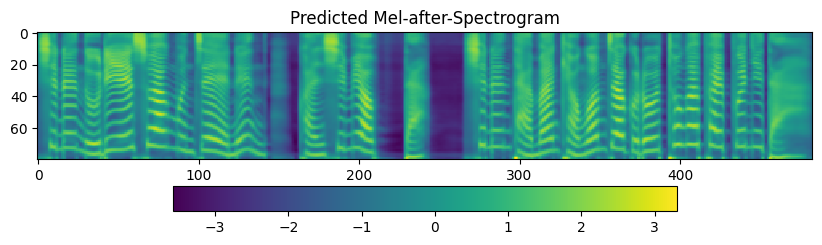

In [23]:
mels, audios = do_synthesis(input_text, fastspeech2, mb_melgan, "FASTSPEECH2", "MB-MELGAN")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

In [28]:
import onnxruntime
import numpy as np

# 모델 불러오기
fastspeech2_onnx = onnxruntime.InferenceSession('fs2.onnx')
mb_melgan_onnx = onnxruntime.InferenceSession('mbmel.onnx')

# 추론하기
mels, audios = do_synthesis(input_text, fastspeech2_onnx, mb_melgan_onnx, "FASTSPEECH2", "MB-MELGAN")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

TypeError: ignored